In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
root_dir = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"

In [3]:
BATCH_SIZE  = 32
EPOCHS = 10
input_img_size = (128,128)
input_shape = (128,128,3)

In [4]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/test",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)

Found 2752 files belonging to 2 classes.
Found 248 files belonging to 2 classes.


2025-08-03 19:59:29.498319: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-08-03 19:59:29.498508: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-08-03 19:59:29.498512: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1754225969.499061 19500558 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1754225969.499105 19500558 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


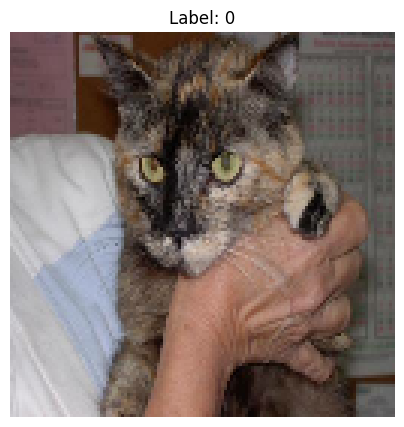

In [7]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0].numpy() / 255.)  # normalize if not already
    plt.title(f"Label: {int(labels[0])}")
    plt.axis('off')
    plt.show()
    break

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation='softmax')
    
])

/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    13,779,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,868,545 (52.90 MB)

 Trainable params: 13,868,545 (52.90 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/10


/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2025-08-03 20:00:45.557072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.4998 - loss: 438.7771 - val_accuracy: 0.4597 - val_loss: 1.2562
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5000 - loss: 1.3891 - val_accuracy: 0.4597 - val_loss: 1.0360
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4996 - loss: 3.0900 - val_accuracy: 0.4597 - val_loss: 2.0380
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5053 - loss: 1.6932 - val_accuracy: 0.4597 - val_loss: 3.2483
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5016 - loss: 1.2755 - val_accuracy: 0.4597 - val_loss: 1.5406
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5052 - loss: 0.6590 - val_accuracy: 0.4597 - val_loss: 1.4693
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5000 - loss: 0.9812 - val_accuracy: 0.4597 - val_loss: 15.1758
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5022 - loss: 13.5566 - val_accuracy: 0.4597 - val_loss

In [11]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4466 - loss: 23.7727
Validation Loss: 24.3765
Validation Accuracy: 0.4597


In [13]:
BATCH_SIZE
input_shape

(128, 128, 3)

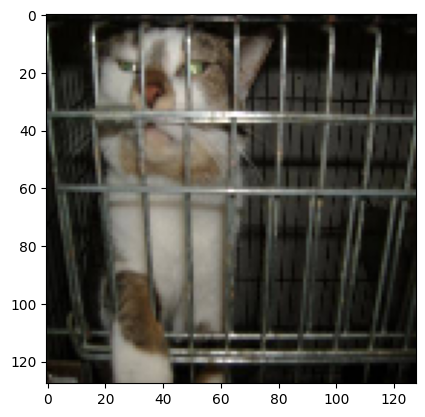

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2366.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [15]:
class_names = train_ds.class_names

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [16]:
class_names

['cats', 'dogs']

In [21]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.float32(1.0)

In [24]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: dogs with confidence 1.00


### Model Saving

In [58]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: 12345678_THS


In [59]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [60]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = train_ds.class_names

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
